## Value Iteration Algorithm
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gamma = 0.5
num_state = 5 
num_action = 3 
num_iter = 10

In [3]:
# Transition probabilities 
# Each of the states s
# Each of the actions a (left, stay, right)
# Probability from s with a to s'
T = np.array([ 
    [
        [1/2,1/2,0,0,0], 
        [1/2,1/2,0,0,0], 
        [2/3,1/3,0,0,0]
    ], [
        [1/3,2/3,0,0,0], 
        [1/4,1/2,1/4,0,0], 
        [0,2/3,1/3,0,0]
    ], [
        [0,1/3,2/3,0,0], 
        [0,1/4,1/2,1/4,0], 
        [0,0,2/3,1/3,0]
    ], [
        [0,0,1/3,2/3,0], 
        [0,0,1/4,1/2,1/4], 
        [0,0,0,2/3,1/3]
    ], [
        [0,0,0,1/3,2/3], 
        [0,0,0,1/2,1/2], 
        [0,0,0,1/2,1/2]
    ], 
])

In [9]:
# Initializing state values
V_0 = np.zeros(num_state)

# Rewards only based on state
R = np.zeros(num_state)
R[4] = 1

$$V_{\blue{k+1}}^\star(s)=\max_a
\left[ 
\sum_{s^\prime} T(s,a,s^\prime)*\Big(R(s,a,s^\prime) + \gamma V_{\blue{k}}^\star(s^\prime)\Big)
\right]

In [5]:
def value_iteration(V_0: np.array, T: np.array, gamma: float) -> np.array:
    """Comment this"""
    
    # new state values
    V_1 = np.empty(num_state)

    # Iterate over all starting states
    for s in range(num_state):
        # Q-values of best actions
        V_s = np.inf*-1

        # Iterate over all actions given a starting state
        for a in range(num_action):
            # Probability weighted Q-value of given state-action
            Q_sa = 0

            # Iterate over target states given starting state and action
            for t in range(num_state):
                Q_sa += T[s][a][t]*(R[s]+gamma*V_0[t])
            
            # State value is the Q-value for the optimal action
            V_s = max(V_s, Q_sa)
        
        # Collect the state values of each state into an array
        V_1[s] = V_s

    return V_1

In [16]:
arr = np.empty((10, 5))

for i in range(10):
    V_1 = value_iteration(V_0=V_0, T=T, gamma=gamma)
    V_0 = V_1
    arr[i] = V_1

print(V_1)

[0.00761459 0.02415681 0.09904883 0.39902345 1.59902343]


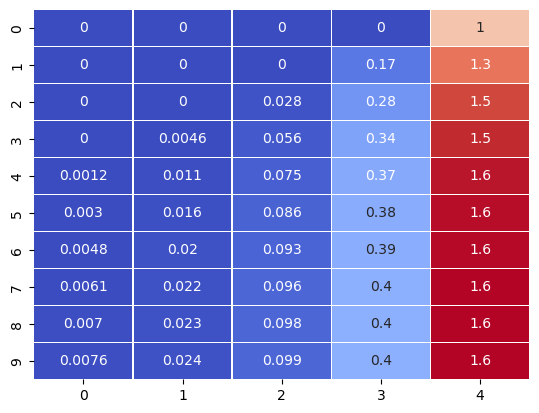

In [15]:
sns.heatmap(V_1_arr, annot=True, cmap="coolwarm", cbar=False, edgecolor="w", lw=0.2)
plt.show()